# Problem Set 9 (Car Dataset)

> Dataset - https://archive.ics.uci.edu/ml/machine-learning-databases/car/ 

> The following dataset is used to classify the car acceptability into classes: unacceptable, acceptable, good and very good.Predict and display the class label of a car with following attributes : buying, main, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med].


## Part A

1.	Import Libraries/Dataset 
 
 a.	Download the dataset - car.data
 
 b.	Import the required libraries


2.	Data Visualization and Exploration
 
 a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
 
 b.	Print the description and shape of the dataset.
 
 c.	Provide appropriate visualization to get an insight about the dataset.
 
 d.	Try exploring the data and see what insights can be drawn from the dataset.


3.	Data Pre-processing and cleaning
 
 a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.
 
 b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.
 
 c.	Do the correlational analysis on the dataset. Provide a visualization for the same.


4.	Data Preparation
 
 a.	Do the final feature selection and extract them into Column X and the class label into Column into Y.
 
 b.	Split the dataset into training and test sets.


### A.1 Import Libraries/Dataset



In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix, accuracy_score

LINE = "_____________________________________________________________________________________________"

In [2]:
# Download and load the Dataset

DF_HEADERS = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "result_class"]
df = pd.read_csv('data\\car.data', names= DF_HEADERS)

### A.2 Data Visualization and Exploration

In [3]:
# Print at least 5 rows for sanity check to identify all the features present in the dataset 
# and if the target matches with them.
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,result_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Print the description and shape of the dataset.
df.describe()

,buying,maint,doors,persons,lug_boot,safety,result_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,4,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
df.shape

(1728, 7)

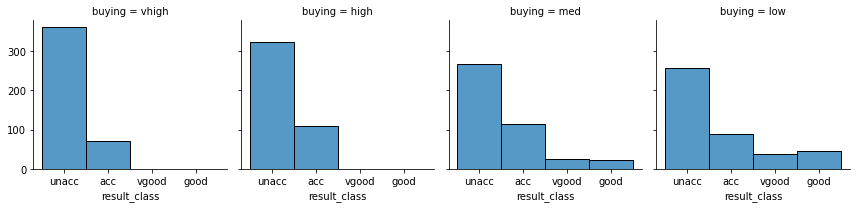

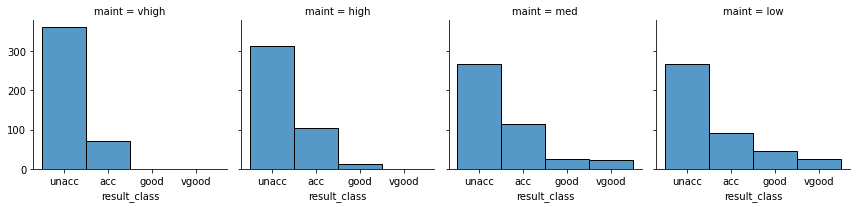

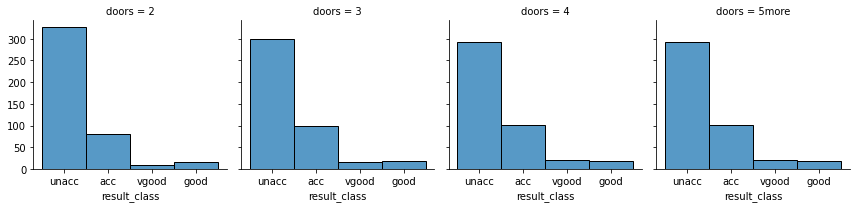

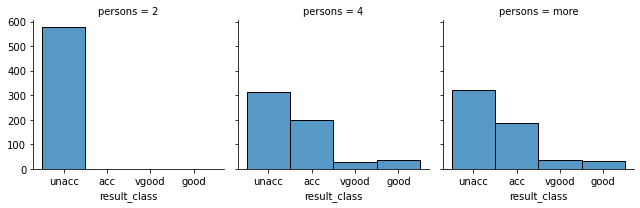

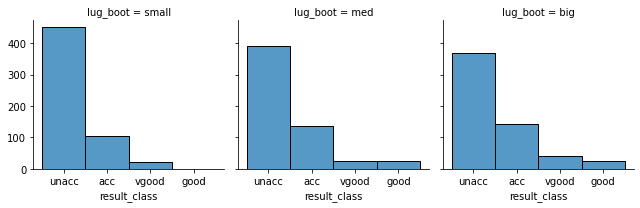

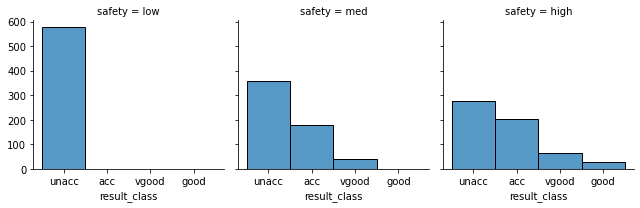

In [7]:
# Provide appropriate visualization to get an insight about the dataset.

# Plotting the feature class occurences against the result label

raw_features = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]


for each in raw_features:
    g = sns.FacetGrid(df[DF_HEADERS], col=each)
    g.map(sns.histplot, "result_class")



> The above analysis shows that our data contains majority of the unacceptable class. It also shows that there are few attributes which directly relate to unacceptable class, for instance all 'low' safety tags are unacceptable.

In [9]:
# Try exploring the data and see what insights can be drawn from the dataset.

print("The data present is all categorical features.")

# Check for NA fields, value counts and unique values
for each in DF_HEADERS:
    print(LINE)
    print("Analysis of:", each)
    print("Unique classes ",df[each].unique())
    print("Number of NA fields in the column:", len(df[df[each].isna()]))
    print("Count of each category in the data:\n", df[each].value_counts())
    print(LINE)

The data present is all categorical features.
_____________________________________________________________________________________________
Analysis of: buying
Unique classes  ['vhigh' 'high' 'med' 'low']
Number of NA fields in the column: 0
Count of each category in the data:
 low      432
vhigh    432
med      432
high     432
Name: buying, dtype: int64
_____________________________________________________________________________________________
_____________________________________________________________________________________________
Analysis of: maint
Unique classes  ['vhigh' 'high' 'med' 'low']
Number of NA fields in the column: 0
Count of each category in the data:
 low      432
vhigh    432
med      432
high     432
Name: maint, dtype: int64
_____________________________________________________________________________________________
_____________________________________________________________________________________________
Analysis of: doors
Unique classes  ['2' '3' '4' '5

In [10]:
# Printing DF info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   result_class  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### A.3 Data Pre-processing and cleaning

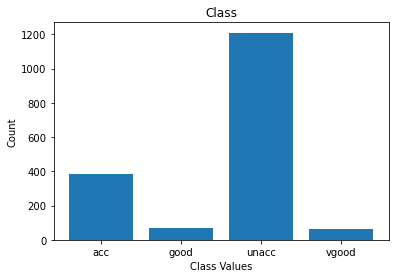

In [11]:
# check for data imbalance
def count_class_values(df, label):
    
    classvalues, count = np.unique(df[label],return_counts=True)
    
    # Plotting the Different class occurences
    plt.bar(classvalues,count)
    plt.title("Class")
    plt.xlabel("Class Values")
    plt.ylabel("Count")
    plt.show()
count_class_values(df, 'result_class')

> We won't downsample classes as we can train a model which can take the imbalance (ex. LightGBM) as a input later and predict the right set of attributes.

In [12]:
# Feature transformation
# Encoding features

label_encoder = LabelEncoder()

for label_name in raw_features:
    print(LINE)
    print("Encoding the class values. Current values are:", df[label_name].unique())
    label_encoder.fit(df[label_name])
    df[label_name] = label_encoder.transform(df[label_name])
    v = df[label_name].unique()
    print("Post encoding the values are:", v, "against the original:", label_encoder.inverse_transform(v))

_____________________________________________________________________________________________
Encoding the class values. Current values are: ['vhigh' 'high' 'med' 'low']
Post encoding the values are: [3 0 2 1] against the original: ['vhigh' 'high' 'med' 'low']
_____________________________________________________________________________________________
Encoding the class values. Current values are: ['vhigh' 'high' 'med' 'low']
Post encoding the values are: [3 0 2 1] against the original: ['vhigh' 'high' 'med' 'low']
_____________________________________________________________________________________________
Encoding the class values. Current values are: ['2' '3' '4' '5more']
Post encoding the values are: [0 1 2 3] against the original: ['2' '3' '4' '5more']
_____________________________________________________________________________________________
Encoding the class values. Current values are: ['2' '4' 'more']
Post encoding the values are: [0 1 2] against the original: ['2' '4' 'mor

Text(0.5, 1.0, 'Correlation Matrix')

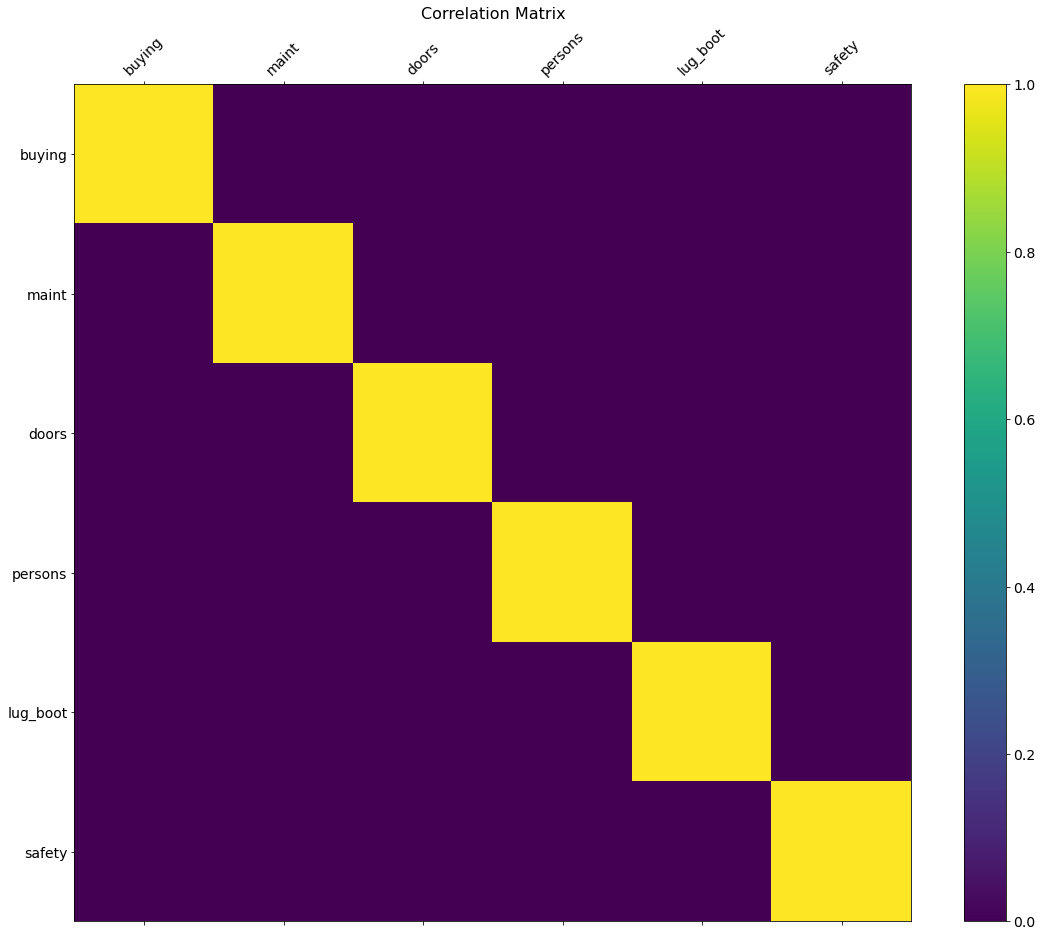

In [13]:
# Do the correlational analysis on the dataset. Provide a visualization for the same.

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)



### A.4 Data Preparation

In [14]:
# Do the final feature selection and extract them into Column X and the class label into Column into Y.
X, y = df.drop(['result_class'], axis = 1), df['result_class']


In [15]:
# Split the dataset into training and test sets.

# We split the data into a 75-25 split with stratiied as true.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

## Part B

1.	Model Building

 a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

 b.	 Train the model and print the training accuracy and loss values.


2.	Performance Evaluation

 a.	Print the confusion matrix. Provide appropriate analysis for the same.

 b.	Do the prediction for the test data and display the results for the inference. 


In [20]:
#3 Scikit learn function to plot the tr

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


### Model Building

We will choose the following 3 models:

1. **Naive Bayes** : It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors.

2. **Logistic Regression** :  The logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

3. **LightGBM** : LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks.

> As our model consists of categorical data, a tree based model should perform the best on this dataset. Given there is also data imbalance we can use light GBM to model the same.

#### Gaussian Naive Bayes

<module 'matplotlib.pyplot' from 'C:\\Users\\Shreyansh\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

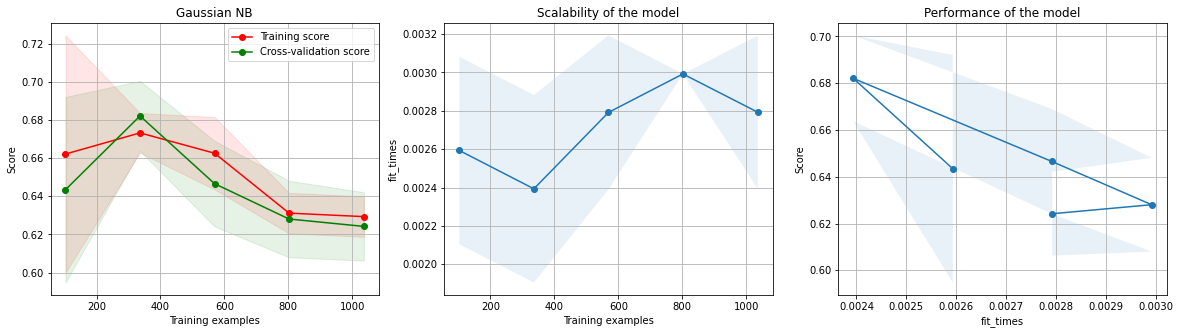

In [21]:
# Perform Model Development 

# Model 1 (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Train the model and print the training accuracy and loss values.
gnb.fit(X_train, y_train)

plot_learning_curve(gnb, "Gaussian NB", X_train, y_train)

#### Performance Evaluation

In [23]:
# Do the prediction for the test data and display the results for the inference

y_pred_1 = gnb.predict(X_test)

print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred_1)*100)

Gaussian Naive Bayes model accuracy(in %): 63.657407407407405


In [24]:
cr_1 = classification_report(y_test, y_pred_1)
print(cr_1)

              precision    recall  f1-score   support

         acc       0.42      0.10      0.17        96
        good       0.00      0.00      0.00        17
       unacc       0.86      0.82      0.84       303
       vgood       0.13      1.00      0.24        16

    accuracy                           0.64       432
   macro avg       0.35      0.48      0.31       432
weighted avg       0.70      0.64      0.64       432



C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


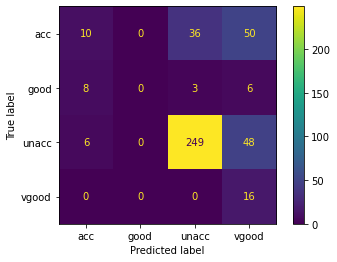

In [25]:
# confusion matrix
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show() 

#### Logistic Regression

<module 'matplotlib.pyplot' from 'C:\\Users\\Shreyansh\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

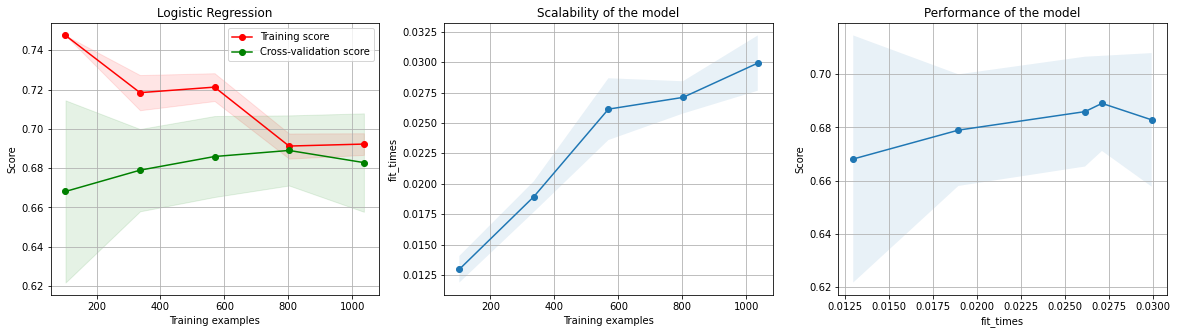

In [26]:
# Model 2 (Logistic Regression) building
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

plot_learning_curve(lr_clf, "Logistic Regression", X_train, y_train)

#### Performance Evaluation

In [27]:
# Do the prediction for the test data and display the results for the inference

y_pred_2 = lr_clf.predict(X_test)

print("Logistic Regression model accuracy(in %):", accuracy_score(y_test, y_pred_2)*100)

Logistic Regression model accuracy(in %): 69.9074074074074


In [28]:
cr_2 = classification_report(y_test, y_pred_2)
print(cr_2)

              precision    recall  f1-score   support

         acc       0.37      0.21      0.27        96
        good       0.00      0.00      0.00        17
       unacc       0.76      0.92      0.83       303
       vgood       0.40      0.25      0.31        16

    accuracy                           0.70       432
   macro avg       0.38      0.34      0.35       432
weighted avg       0.63      0.70      0.65       432



C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreyansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


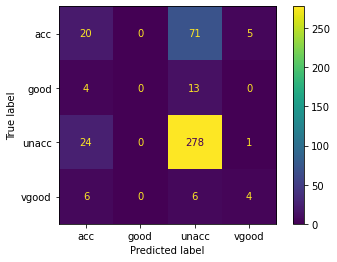

In [29]:
# confusion matrix
plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.show() 

#### LightGBM

<module 'matplotlib.pyplot' from 'C:\\Users\\Shreyansh\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

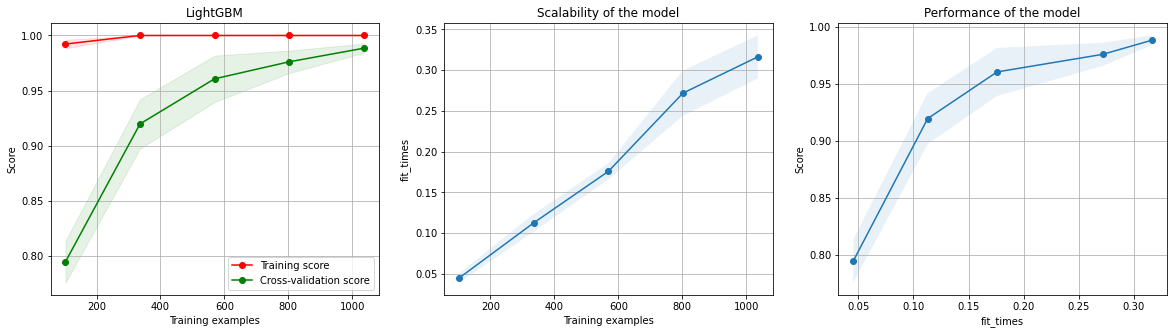

In [32]:
# Model 3 (LightGBM) Building

import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()

lgb_clf.fit(X_train, y_train)

plot_learning_curve(lgb_clf, "LightGBM", X_train, y_train)

#### Performance Evaluation

In [33]:
# Do the prediction for the test data and display the results for the inference

y_pred_3 = lgb_clf.predict(X_test)
print("Light GBM model accuracy(in %):", accuracy_score(y_test, y_pred_3)*100)

Light GBM model accuracy(in %): 98.61111111111111


In [34]:
cr_3 = classification_report(y_test, y_pred_3)
print(cr_3)

              precision    recall  f1-score   support

         acc       0.95      1.00      0.97        96
        good       0.94      0.94      0.94        17
       unacc       1.00      0.98      0.99       303
       vgood       1.00      1.00      1.00        16

    accuracy                           0.99       432
   macro avg       0.97      0.98      0.98       432
weighted avg       0.99      0.99      0.99       432



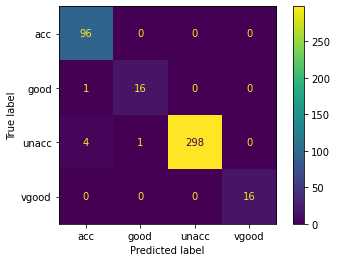

In [35]:
# confusion matrix
plot_confusion_matrix(lgb_clf, X_test, y_test)  
plt.show() 

## Conclusion

We see that as stipulated, the Light GBM model out performs the Naive bayes and logistic regression classifier techniques. We are able to predict the values with a very high precision and recall. 